Processed /Users/tim/COMP535/project1/input_images/istockphoto-1552626499-612x612.jpg in 0.03 seconds
Processed /Users/tim/COMP535/project1/input_images/istockphoto-1552626499-612x612.jpg
Processed /Users/tim/COMP535/project1/input_images/9877ce5c0ff678e95b26394b061e1d43.jpg in 0.04 seconds
Processed /Users/tim/COMP535/project1/input_images/9877ce5c0ff678e95b26394b061e1d43.jpg
Processed /Users/tim/COMP535/project1/input_images/ClearingFogAtLochVale.jpg in 0.10 seconds
Processed /Users/tim/COMP535/project1/input_images/ClearingFogAtLochVale.jpg
Processed all images in 0.10 seconds


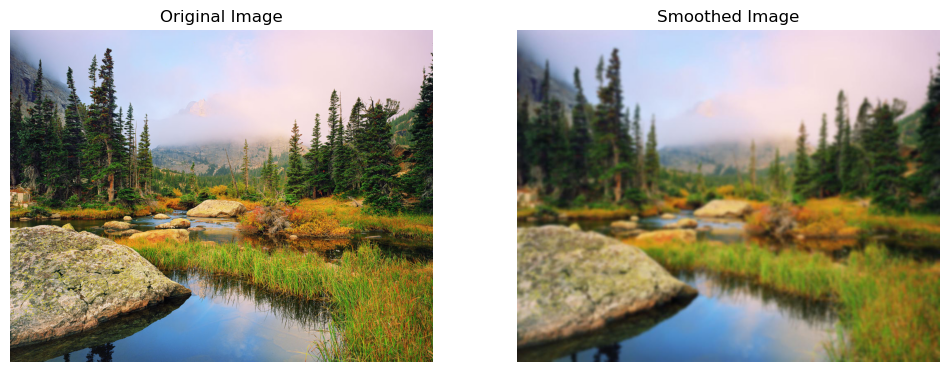

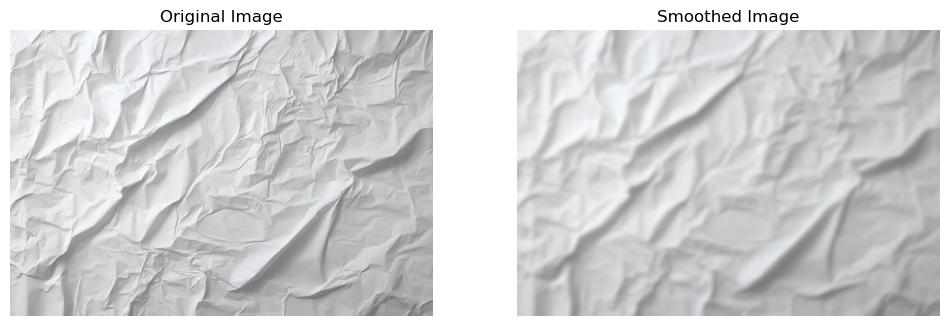

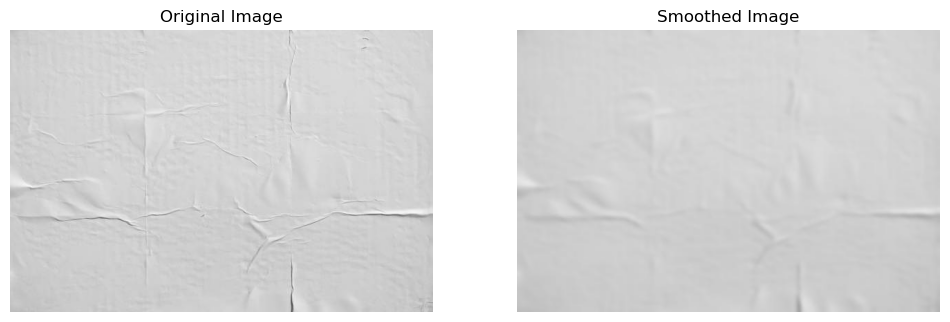

In [35]:
import os
import numpy as np
from PIL import Image
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor, as_completed
import time  # Import the time module

def process_image(image_path, output_path, sigma):
    """
    Processes a single image by applying Gaussian smoothing and saves it.
    """
    start_time = time.time()  # Start timer for this image

    image = Image.open(image_path)
    image_array = np.array(image)
    
    # If the image is in RGB format, apply the filter to each channel
    if image_array.ndim == 3:  # Check if it's an RGB image
        smoothed_image_array = np.zeros_like(image_array)
        for channel in range(3):  # Apply filter to each channel independently
            smoothed_image_array[:, :, channel] = gaussian_filter(image_array[:, :, channel], sigma=sigma)
    else:
        # If grayscale, just apply the filter directly
        smoothed_image_array = gaussian_filter(image_array, sigma=sigma)
    
    smoothed_image = Image.fromarray(np.uint8(smoothed_image_array))
    
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    
    output_image_path = os.path.join(output_path, os.path.basename(image_path))
    smoothed_image.save(output_image_path)

    end_time = time.time()  # End timer for this image
    duration = end_time - start_time  # Calculate the time taken
    print(f"Processed {image_path} in {duration:.2f} seconds")  # Print the time taken for each image

    return output_image_path

def process_images_in_parallel(input_path, output_path, sigma):
    """
    Processes images in parallel using ThreadPoolExecutor.
    """
    if not os.path.exists(output_path):
        os.makedirs(output_path)
        
    image_files = [f for f in os.listdir(input_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]
    image_paths = [os.path.join(input_path, f) for f in image_files]

    start_time = time.time()  # Start timer for the entire process
    
    with ThreadPoolExecutor() as executor:
        futures = {executor.submit(process_image, image_path, output_path, sigma): image_path for image_path in image_paths}
        for future in as_completed(futures):
            image_path = futures[future]
            try:
                result = future.result()
                print(f"Processed {image_path}")
            except Exception as e:
                print(f"Error processing {image_path}: {e}")

    end_time = time.time()  # End timer for the entire process
    total_duration = end_time - start_time  # Calculate total time taken
    print(f"Processed all images in {total_duration:.2f} seconds")  # Print total time

def display_image_pairs(input_path, output_path, num_pairs=5):
    """
    Displays original and processed images side by side.
    """
    input_images = [f for f in os.listdir(input_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]
    image_names = input_images[:num_pairs]
    
    for image_name in image_names:
        input_image_path = os.path.join(input_path, image_name)
        output_image_path = os.path.join(output_path, image_name)
        
        if os.path.exists(output_image_path):
            input_image = Image.open(input_image_path)
            output_image = Image.open(output_image_path)
            
            fig, axes = plt.subplots(1, 2, figsize=(12, 6))
            axes[0].imshow(input_image)
            axes[0].set_title('Original Image')
            axes[0].axis('off')
            
            axes[1].imshow(output_image)
            axes[1].set_title('Smoothed Image')
            axes[1].axis('off')
            
            plt.show()
        else:
            print(f"Processed image not found for {image_name}")

# Replace these paths with your actual directories
input_path = '/Users/tim/COMP535/project1/input_images'  # Replace with your input folder path
output_path = '/Users/tim/COMP535/project1/output_images '  # Replace with your output folder path
sigma = 3  # Standard deviation for Gaussian kernel

# Measure and display the time it takes to process the images
process_images_in_parallel(input_path, output_path, sigma)
display_image_pairs(input_path, output_path, num_pairs=5)
